In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 40)

# from vivarium_research_prl.noise import corruption, fake_names

!date
!whoami
!uname -a
!pwd

Wed 07 Dec 2022 03:01:31 PM PST
ndbs
Linux int-slurm-sarchive-p0009 5.4.0-88-generic #99-Ubuntu SMP Thu Sep 23 17:29:00 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux
/mnt/share/code/ndbs/vivarium_research_prl/linkage/wic_case_study


In [2]:
%load_ext autoreload
%autoreload 2

# Load state table for 2020

In [3]:
project_output_dir = '/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop'
output_subdir = 'results/special_last_names/florida/2022_10_14_10_49_32/population_table/'
output_dir = f'{project_output_dir}/{output_subdir}'

!ls -l $output_dir

total 32224
-rw-rw-r-- 1 albrja   IHME-Simulationscience 12622072 Oct 20 23:08 decennial_census.hdf
-rwxrwxrwx 1 beatrixh IHME-Simulationscience 20364830 Nov 14 16:42 state_table.hdf


In [4]:
state_table_path = f'{output_dir}/state_table.hdf'
with pd.HDFStore(state_table_path, 'r') as state_table_hdf:
    print(state_table_hdf.info())
    state_table_keys = state_table_hdf.keys()

<class 'pandas.io.pytables.HDFStore'>
File path: /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/special_last_names/florida/2022_10_14_10_49_32/population_table//state_table.hdf
/ymd_2020_4_1            frame        (shape->[50000,27])
/ymd_2040_5_1            frame        (shape->[57470,27])


In [5]:
state_table_df = pd.read_hdf(state_table_path, 'ymd_2020_4_1')
print(f'{state_table_df.shape=}')
state_table_df.columns

state_table_df.shape=(50000, 27)


Index(['tracked', 'middle_name', 'sex', 'relation_to_household_head',
       'race_ethnicity', 'housing_type', 'exit_time', 'last_name', 'state',
       'ssn', 'date_of_birth', 'first_name', 'entrance_time', 'age',
       'household_id', 'alive', 'puma', 'years_of_life_lost', 'cause_of_death',
       'zipcode', 'address', 'parent_id', 'last_birth_time', 'employer_id',
       'employer_name', 'employer_zipcode', 'employer_address'],
      dtype='object')

In [6]:
state_table_df

,tracked,middle_name,sex,relation_to_household_head,race_ethnicity,housing_type,exit_time,last_name,state,ssn,...,years_of_life_lost,cause_of_death,zipcode,address,parent_id,last_birth_time,employer_id,employer_name,employer_zipcode,employer_address
0,True,Jenny,Female,Reference person,Black,Standard,NaT,Clark,12,486-24-8278,...,0.0,not_dead,34601,"1344 winoka rd brooksville, fl",-1,2019-03-04 18:00:00,46,not implemented,33187,"2408 brookshire dr sunset corners, fl"
1,True,Virgil,Male,Reference person,Black,Standard,NaT,Littlejohn,12,108-89-8623,...,0.0,not_dead,34698,"927 23rd st clearwater, fl",-1,NaT,193,not implemented,33948,"144 tulip ln prt charlotte, fl"
2,True,Annaliese,Female,Biological child,Black,Standard,NaT,Jackson,12,788-05-3097,...,0.0,not_dead,34698,"927 23rd st clearwater, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA
3,True,Devyn,Male,Stepchild,Black,Standard,NaT,Cox,12,,...,0.0,not_dead,34698,"927 23rd st clearwater, fl",-1,NaT,204,not implemented,33169,"1835 harvard dr hialeah, fl"
4,True,Jonathan,Male,Reference person,White,Standard,NaT,Tucker,12,009-31-4192,...,0.0,not_dead,32003,"8904 167th place fleming island, fl",-1,NaT,176,not implemented,34293,"2607 e bluefield ave venice, fl"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,Nicholas,Male,Institutionalized GQ pop,White,Other institutional,NaT,Roberts,12,625-97-5353,...,0.0,not_dead,33919,"114 s frnt st fort myers, fl",-1,NaT,-1,unemployed,NA,NA
49996,True,John,Male,Institutionalized GQ pop,White,Carceral,NaT,Campbell,12,238-09-2208,...,0.0,not_dead,33021,"2210 henn hyde rd ne hollywood, fl",-1,NaT,-1,unemployed,NA,NA
49997,True,Charles,Male,Institutionalized GQ pop,Latino,Nursing home,NaT,Rosales,12,650-80-3526,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,-1,unemployed,NA,NA
49998,True,Jermaine,Male,Institutionalized GQ pop,White,Other institutional,NaT,Morton,12,784-92-1608,...,0.0,not_dead,33919,"114 s frnt st fort myers, fl",-1,NaT,19,not implemented,33444,"92 address unassigned delray beach, fl"


# Get data on WIC coverage and eligibility

See these references for data on WIC coverage and eligibility rates:

* https://www.fns.usda.gov/wic/2019-eligibility-coverage-rates

* https://www.fns.usda.gov/wic/national-state-level-estimates-eligibility-program-reach-2019

* [Syl's original documentation of overall coverage rates by age](https://github.com/ihmeuw/vivarium_research/pull/1047/commits/baf24a6c41dfbb0c5ecd19d084b75e50408a5db1#diff-45a09ee257e7b14d6545111feb3c2f747ef32aa90038f0dbc028e55d2ff08f0d) (copied below)

**Coverage Rate by Age**

  * - Infants (less than age 1)
    - 98.4% 
  * - Children Age 1
    - 64.9% 
  * - Children Age 2
    - 48.5% 
  * - Children Age 3
    - 43.7% 
  * - Children Age 4
    - 24.5% 
  * - Tracked Mothers and Guardians with Children 
    - 84.7%
    
# National WIC coverage rates by age group

Here's a chart from the [WIC 2019 Eligibility and Coverage Rates webpage](https://www.fns.usda.gov/wic/2019-eligibility-coverage-rates) showing the national coverage data Syl reported above:

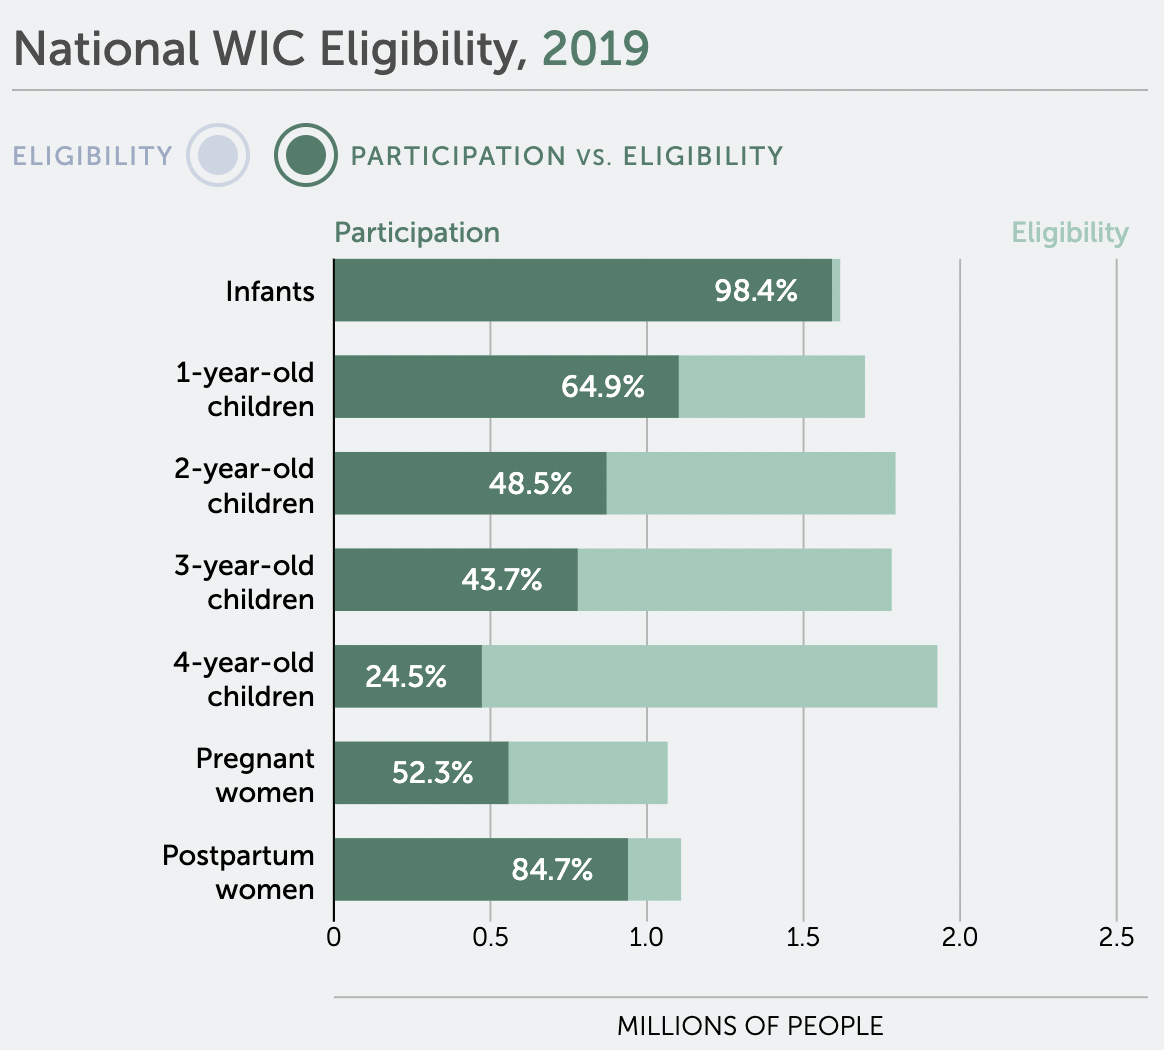
    
## Since we don't simulate income yet, I will need to combine the coverage rates with eligibility rates to get data I can use with the current Vivarium state table output


# National WIC eligibility rates by age group

Here's a table from p. ii of the USDA [National and State Level Estimates of WIC Eligibility and Program Reach in 2019 Final Report](https://fns-prod.azureedge.us/sites/default/files/resource-files/WICEligibles2019-Volume1-revised.pdf):

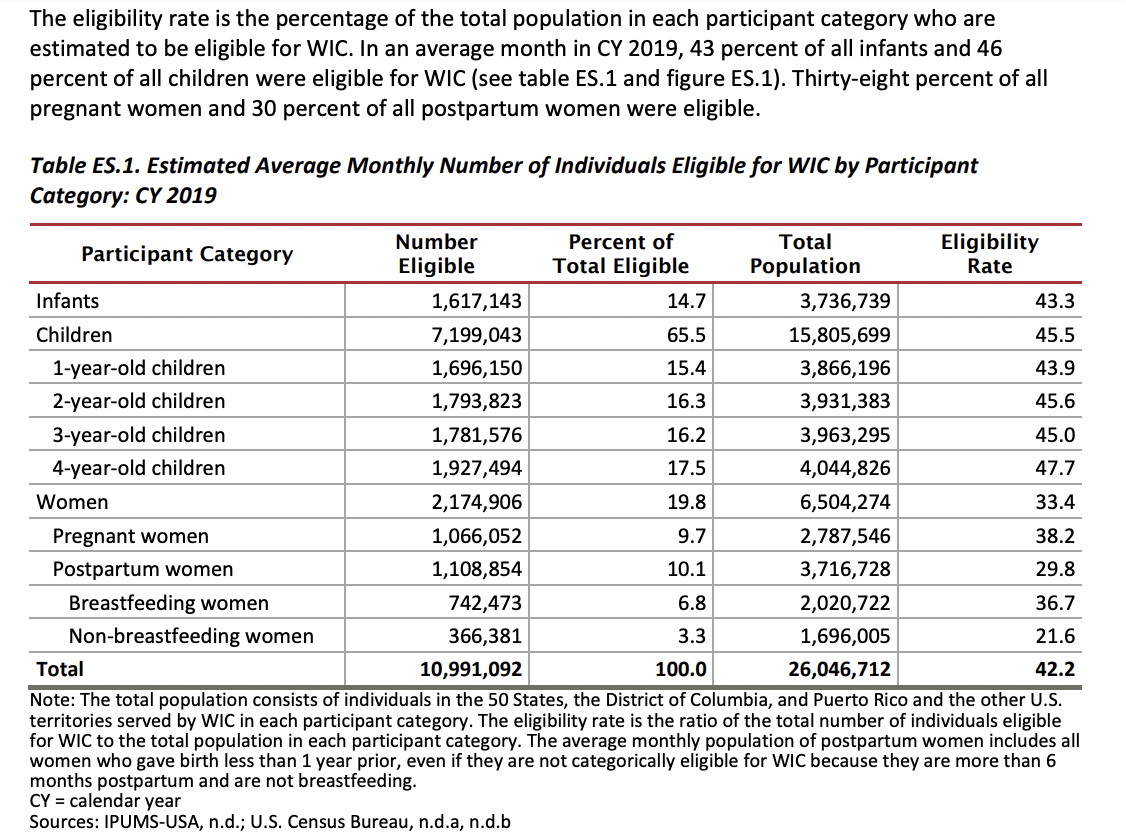

In [7]:
def get_wic_coverage_df():
    wic_coverage_df = pd.DataFrame(
        {
            'eligibility': [43.3, 43.9, 45.6, 45.0, 47.7, 38.2, 29.8],
            'coverage': [98.4, 64.9, 48.5, 43.7, 24.5, 52.3, 84.7],
        },
        index=[
            'Infants',
            '1-year-old children',
            '2-year-old children',
            '3-year-old children',
            '4-year-old children',
            'Pregnant women',
            'Postpartum women',
        ]
    ) / 100
    
    wic_coverage_df.rename_axis('category', inplace=True)
    wic_coverage_df['population_coverage'] = (
        wic_coverage_df['eligibility'] * wic_coverage_df['coverage']
    )
    return wic_coverage_df

get_wic_coverage_df()

,eligibility,coverage,population_coverage
category,,,
Infants,0.433,0.984,0.426072
1-year-old children,0.439,0.649,0.284911
2-year-old children,0.456,0.485,0.221160
3-year-old children,0.450,0.437,0.196650
4-year-old children,0.477,0.245,0.116865
Pregnant women,0.382,0.523,0.199786
Postpartum women,0.298,0.847,0.252406


# Write a function to generate WIC data

Actually multiple functions: Write some subfunctions for discrete tasks, and write an overall function to combine them.

In [8]:
np.random.SeedSequence()

SeedSequence(
    entropy=107096518197582265707773650130238540374,
)

In [9]:
# Copy and paste original seed entropy to get reproducible results
# (By copying and pasting once, this seed won't change when notebook is rerun
# unless manually edited by user)
seed = 266570034785235402166945664636642754931
rng = np.random.default_rng(seed)
rng

Generator(PCG64) at 0x7F02CEC99580

In [10]:
state_table_df.columns

Index(['tracked', 'middle_name', 'sex', 'relation_to_household_head',
       'race_ethnicity', 'housing_type', 'exit_time', 'last_name', 'state',
       'ssn', 'date_of_birth', 'first_name', 'entrance_time', 'age',
       'household_id', 'alive', 'puma', 'years_of_life_lost', 'cause_of_death',
       'zipcode', 'address', 'parent_id', 'last_birth_time', 'employer_id',
       'employer_name', 'employer_zipcode', 'employer_address'],
      dtype='object')

In [11]:
def select_random_wic_participants(state_table_df, random_state=None):
    wic_coverage_df = get_wic_coverage_df()
    # Make sure we only initialize with a seed once so that the same
    # seed doesn't get used in every iteration of the for loop
    rng = np.random.default_rng(random_state)
    include_in_wic = pd.Series(False, index=state_table_df.index, name='wic_participant')
    age_year = np.floor(state_table_df['age'])
    for age in range(5):
        wic_category = 'Infants' if age == 0 else f'{age}-year-old children'
        pop_group = (age_year == age) & (state_table_df['cause_of_death'] == 'not_dead')
        pop_size = pop_group.sum() # Number of True's
        include_in_wic.loc[pop_group] = (
            rng.random(pop_size) < wic_coverage_df.loc[wic_category, 'population_coverage']
        )
    return include_in_wic

def select_wic_columns(state_table_df, rows_to_include=None):
    if rows_to_include is None:
        rows_to_include = state_table_df.index
    columns_for_wic = (
        ['first_name', 'middle_name', 'last_name', 'date_of_birth']
        + ['sex', 'race_ethnicity']
        + ['address', 'zipcode', 'household_id']
    )
    wic_df = state_table_df.loc[rows_to_include, columns_for_wic]
    wic_df['wic_id'] = range(1, 1+len(wic_df))
    return wic_df

def generate_wic_data(state_table_df, random_state=None):
    include_in_wic = select_random_wic_participants(state_table_df, random_state)
    wic_df = select_wic_columns(state_table_df, include_in_wic)
    return wic_df

wic_df = generate_wic_data(state_table_df, seed)
wic_df#.columns

,first_name,middle_name,last_name,date_of_birth,sex,race_ethnicity,address,zipcode,household_id,wic_id
98,Jaxson,Fletcher,Peterson,2017-11-09,Male,White,"5266 shady rd orange city, fl",32763,54,1
166,Everleigh,Ireland,Dietzman,2020-02-25,Female,White,"1286 county road 185 pembroke pines, fl",33024,85,2
203,Nolan,Jiovanni,Lozano,2019-04-09,Male,Latino,"4917 gallatin way deerfield beach, fl",33442,102,3
206,Zaiden,Liam,Smith,2018-02-23,Male,White,"18341 se sandy ln kissimmee, fl",34747,103,4
269,Reagan,Cypress,Hunter,2015-12-14,Female,Black,"1022 wood st miami, fl",33134,133,5
...,...,...,...,...,...,...,...,...,...,...
48186,Alana,Sienna,Brobst,2019-09-28,Female,White,"5550 deer timbers trl belleair, fl",33756,20346,619
48340,Dakota,Jaslyn,Brown,2018-06-09,Female,Black,"24 marie dr lake alfred, fl",33850,20417,620
48351,Lev,Thomas,Dove,2018-10-18,Male,Black,"671 john muir road spring hill, fl",34610,20422,621
48425,Luke,Hunter,Gonzalez,2018-04-07,Male,Latino,"4877 pointillist ct chiefland, fl",32626,20448,622


## Tests for above code

* See if there were any dead people in the state table. Nope, not for 2020, but I know there were some for 2030 and 2040, so maybe it's because it's the beginning of the sim.

* Check that my `select_wic_columns` works when the selected rows are `None`. Yep, looks good.

In [12]:
state_table_df.cause_of_death.value_counts()

not_dead    50000
Name: cause_of_death, dtype: int64

In [13]:
select_wic_columns(state_table_df)

,first_name,middle_name,last_name,date_of_birth,sex,race_ethnicity,address,zipcode,household_id,wic_id
0,Margaret,Jenny,Clark,1951-07-27,Female,Black,"1344 winoka rd brooksville, fl",34601,6,1
1,Jeffrey,Virgil,Littlejohn,1967-05-03,Male,Black,"927 23rd st clearwater, fl",34698,7,2
2,Briana,Annaliese,Jackson,2006-09-07,Female,Black,"927 23rd st clearwater, fl",34698,7,3
3,Benjamin,Devyn,Cox,1998-10-21,Male,Black,"927 23rd st clearwater, fl",34698,7,4
4,Willie,Jonathan,Tucker,1947-10-09,Male,White,"8904 167th place fleming island, fl",32003,8,5
...,...,...,...,...,...,...,...,...,...,...
49995,Brian,Nicholas,Roberts,1984-07-05,Male,White,"114 s frnt st fort myers, fl",33919,2,49996
49996,Nathaniel,John,Campbell,1941-01-08,Male,White,"2210 henn hyde rd ne hollywood, fl",33021,0,49997
49997,Christian,Charles,Rosales,1983-12-16,Male,Latino,"701 haber rd vero beach, fl",32968,1,49998
49998,Phillip,Jermaine,Morton,1985-06-11,Male,White,"114 s frnt st fort myers, fl",33919,2,49999


# Check household sizes in state table and WIC data

The point is that I want to have some kids in the same household in the WIC data so that if a kid is missing in the census, I might be able to find them through a sibling who's not missing.

- There are several categories of Group Quarters (GQ) with household sizes in the hundreds, a Nursing home with id=1 being the largest at 303 residents.
- Among childeren under 5, the WIC data generated above contains at most 2 children in the same house, whereas the state table contains 50 households with 3 or 4 children (which is the largest number).
- There appears to be one child under 5 living in a nursing home -- let's check that out...

In [14]:
state_table_df.household_id.value_counts()

1        303
0        287
2        272
4        231
5        205
        ... 
10470      1
10462      1
10460      1
10457      1
10242      1
Name: household_id, Length: 20473, dtype: int64

In [15]:
state_table_df.query("household_id==1")

,tracked,middle_name,sex,relation_to_household_head,race_ethnicity,housing_type,exit_time,last_name,state,ssn,...,years_of_life_lost,cause_of_death,zipcode,address,parent_id,last_birth_time,employer_id,employer_name,employer_zipcode,employer_address
49140,True,Thomas,Male,Institutionalized GQ pop,Black,Nursing home,NaT,Pegues,12,860-09-7499,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,30,not implemented,32459,"18659 fairport sta rosa beach, fl"
49143,True,Marie,Female,Institutionalized GQ pop,Latino,Nursing home,NaT,Perez,12,,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA
49148,True,Ernestine,Female,Institutionalized GQ pop,Latino,Nursing home,NaT,Davda,12,443-52-2680,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,2019-03-04 18:00:00,215,not implemented,34689,"96 cothran st harbor palms, fl"
49150,True,Enrique,Male,Institutionalized GQ pop,Black,Nursing home,NaT,Cutchin,12,314-28-0108,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,-1,unemployed,NA,NA
49151,True,Jonathan,Male,Institutionalized GQ pop,Latino,Nursing home,NaT,Renta,12,236-96-8646,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,66,not implemented,32903,"720 hiscock st indialantic, fl"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49986,True,Rena,Female,Institutionalized GQ pop,White,Nursing home,NaT,Evans,12,061-40-1111,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA
49988,True,Brian,Male,Institutionalized GQ pop,White,Nursing home,NaT,Duboise,12,830-16-4048,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,-1,unemployed,NA,NA
49992,True,Jonas,Male,Institutionalized GQ pop,White,Nursing home,NaT,Harris,12,714-25-1479,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,-1,unemployed,NA,NA
49997,True,Charles,Male,Institutionalized GQ pop,Latino,Nursing home,NaT,Rosales,12,650-80-3526,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,-1,unemployed,NA,NA


In [16]:
wic_df.household_id.value_counts()

5249     2
10133    2
12272    2
19213    2
1834     2
        ..
6975     1
6956     1
6890     1
6865     1
20452    1
Name: household_id, Length: 588, dtype: int64

In [17]:
# Looks like there are housholds with 3 or 4 children, which we didn'g get in WIC
# Wait what? There's a child under 5 in a nursing home (household_id=1)
state_table_df.query("age<5")['household_id'].value_counts()

11130    4
3886     4
8122     4
18256    3
15616    3
        ..
7471     1
7465     1
7454     1
7452     1
1        1
Name: household_id, Length: 1979, dtype: int64

In [18]:
(state_table_df.query("age<5")['household_id'].value_counts() > 2).sum()

50

# What's with the one 3-year-old living in a nursing home?

Zeb said [this is to be expected but rare](https://ihme.slack.com/archives/C02KUQ9LX32/p1670439977502869) based on the way we assigned group quarters in the sim.

In [19]:
state_table_df.query("age<5 and household_id==1")

,tracked,middle_name,sex,relation_to_household_head,race_ethnicity,housing_type,exit_time,last_name,state,ssn,...,years_of_life_lost,cause_of_death,zipcode,address,parent_id,last_birth_time,employer_id,employer_name,employer_zipcode,employer_address
49873,True,Amina,Female,Institutionalized GQ pop,Black,Nursing home,NaT,Chatman,12,281-66-3197,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA


In [20]:
state_table_df.loc[49873]

tracked                                               True
middle_name                                          Amina
sex                                                 Female
relation_to_household_head        Institutionalized GQ pop
race_ethnicity                                       Black
housing_type                                  Nursing home
exit_time                                              NaT
last_name                                          Chatman
state                                                   12
ssn                                            281-66-3197
date_of_birth                          2016-06-16 00:00:00
first_name                                           Kiara
entrance_time                          2020-03-04 00:00:00
age                                               3.791505
household_id                                             1
alive                                                alive
puma                                                  33

In [21]:
state_table_df.relation_to_household_head.value_counts()

Reference person               20467
Biological child               11443
Opp-sex spouse                  9467
Opp-sex partner                 1304
Grandchild                       999
Institutionalized GQ pop         862
Parent                           767
Other nonrelative                739
Roommate                         733
Other relative                   681
Noninstitutionalized GQ pop      640
Stepchild                        574
Sibling                          516
Adopted child                    260
Parent-in-law                    183
Child-in-law                     151
Same-sex spouse                  114
Same-sex partner                  71
Foster child                      29
Name: relation_to_household_head, dtype: int64

In [22]:
# Kiara Amina Chatman is the ONLY person under 5 living in
# any kind of group quarters... seems a bit weird there's exactly one
state_table_df.query("relation_to_household_head.str.contains('GQ') and age<5")

,tracked,middle_name,sex,relation_to_household_head,race_ethnicity,housing_type,exit_time,last_name,state,ssn,...,years_of_life_lost,cause_of_death,zipcode,address,parent_id,last_birth_time,employer_id,employer_name,employer_zipcode,employer_address
49873,True,Amina,Female,Institutionalized GQ pop,Black,Nursing home,NaT,Chatman,12,281-66-3197,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA


# See how many people of each age there are

In [23]:
age_counts = np.floor(state_table_df.age).sort_values().value_counts(sort=False)
age_counts

0.0     468
1.0     498
2.0     476
3.0     508
4.0     520
       ... 
89.0    166
90.0    107
91.0     67
94.0     76
95.0    224
Name: age, Length: 94, dtype: int64

In [24]:
def get_age_counts(age_column):
    return np.floor(age_column).sort_values().value_counts(sort=False)

# Get counts of ages up to age 4
state_table_age_counts = get_age_counts(state_table_df.age)[:4]
wic_age_counts = get_age_counts(state_table_df.loc[wic_df.index, 'age'])[:4]

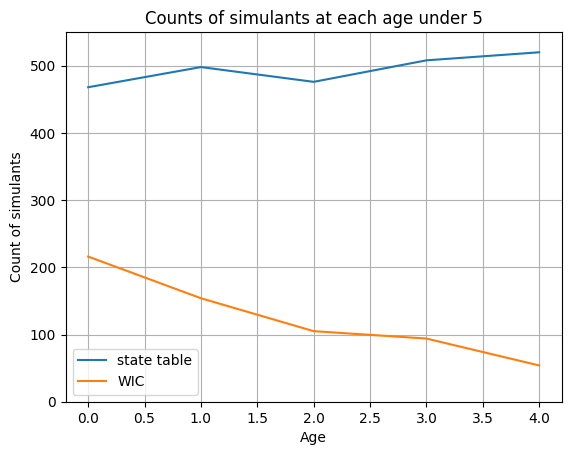

In [25]:
plt.plot(state_table_age_counts.index, state_table_age_counts, label='state table')
plt.plot(wic_age_counts.index, wic_age_counts, label='WIC')
plt.xlabel('Age')
plt.ylabel('Count of simulants')
plt.title("Counts of simulants at each age under 5")
plt.grid()
plt.ylim(0,550)
plt.legend();